## 4. CUSTOMIZED MODELING<a id= '4._Customized_Modeling'><a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Customized Modeling](#1_Customized_Modeling)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Random Forest Regression - Feature Importance](#4.5_Random_Forest_Regression_-_Feature_Importance)
  * [4.6 Random Forest Regression - Subsets Based on Time Periods](#4.6_Random_Forest_Regression_-_Subsets_Based_on_Time_Periods)
  * [4.7 XGB Regression - Feature Importance](#4.7_XGB_Regression_-_Feature_Importance)
  * [4.8 Comparison of XGB and Random Forest Models](#4.8_Comparison_of_XGB_and_Random_Forest_Models)
  * [4.9 XGB Regression - Subsets Based on Time Periods](#4.9_XGB_Regression_-_Subsets_Based_on_Time_Periods)
  * [4.10 Subsetting Based on Genres and Modeling](#4.10_Subsetting_Based_On_Genres_and_Modeling)
  * [4.10.1 Crime](#4.10.1_Crime)
  * [4.10.2 Biography](#4.10.2_Biography)
  * [4.10.3 Action](#4.10.3_Action) 
  * [4.10.4 Drama](#4.10.4_Drama)
  * [4.10.5 Comedy](#4.10.5_Comedy)
  * [4.10.6 Fantasy](#4.10.6_Fantasy)
  * [4.11 The Result Table for All Subsets](#4.11_The_Result_Table_For_All_Subsets)
  * [4.12 Case Study: Which TV Shows Would Have Popularity Scores Above the Mean Score?](#4.12_Case_Study:_Which_TV_Shows_Would_Have_Popularity_Scores_Above_the_Mean_Score?)
  * [4.13 Conclusion](#4.13_Conclusion)

## 4.2 Introduction <a id= '4.2_Introduction'><a>
In this section, we'll see if the Mean Average Percentage Errors of our two best models, Random Forest Regression and XGB Regression get even less by using two techniques:
    (a) eliminating less important features of our tv show dataset
    (b) creating subsets out of dataset and using

## 4.3 Imports <a id = '4.3_Imports'><a>


In [1262]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from datetime import datetime as dt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
! pip install xgboost
import xgboost as xgb
import joblib
import pyreadstat as py

## 4.4 Load Data <a id = '4.4_Load_Data'><a>

In [1263]:
# Installing the necessary library to open the sav files.
!pip install pyreadstat

In [1264]:
!pip install --upgrade pip

In [1265]:
y_test = joblib.load ('y_test.sav')
y_train = joblib.load('y_train.sav')
X_test = joblib.load('X_test.sav')
X_train = joblib.load('X_train.sav')
xgb_model = joblib.load('xgb_model.sav')
random_model =joblib.load('random_model.sav')
linear_model = joblib.load('linear_model.sav')
lasso_model =joblib.load('lasso_model.sav')

In [1266]:
#let's load the main dataset as well
df = pd.read_csv( 'shows_df.csv')


Let's create subsets. First let's separate shows created during and after pandemic from the rest of the dataset.

In [1267]:
models= [('lin_reg', linear_model), ('forest', random_model), ('dt', xgb_model)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)


/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Paramete

/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(sms

In [1268]:
results[0]

{'fit_time': array([0.04724193, 0.00878787, 0.0101409 , 0.00873995, 0.00724721,
        0.00665689, 0.00677919, 0.01649189, 0.00618696, 0.00646186]),
 'score_time': array([0.00220609, 0.00131726, 0.00130391, 0.00130105, 0.00127482,
        0.00134516, 0.00127578, 0.00142694, 0.00127411, 0.00128102]),
 'test_score': array([-0.19444077, -0.20836236, -0.24556447, -0.23294678, -0.24686125,
        -0.21868818, -0.24208745, -0.27171892, -0.43688316, -0.18906669]),
 'train_score': array([-0.18555733, -0.18665039, -0.18173358, -0.18191208, -0.18125017,
        -0.18701665, -0.18063857, -0.17863855, -0.17058179, -0.18623495])}

## 4.5 Random Forest Regression - Feature Importance<a id = '4.5_Random_Forest_Regression_-_Feature_Importance'><a>

Let's investigate feature importance for Random Forest Regression. 

In [1269]:
random_tree = RandomForestRegressor()
random_tree.fit(X_train, y_train)
feature_importances = random_tree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

Feature ranking:
1. feature 7 (0.272011)
2. feature 6 (0.135940)
3. feature 8 (0.116674)
4. feature 4 (0.105234)
5. feature 2 (0.062538)
6. feature 5 (0.055646)
7. feature 0 (0.036271)
8. feature 1 (0.030741)
9. feature 170 (0.009703)
10. feature 123 (0.008434)
11. feature 29 (0.007941)
12. feature 32 (0.007211)
13. feature 13 (0.006631)
14. feature 33 (0.006533)
15. feature 53 (0.006323)
16. feature 9 (0.005582)
17. feature 26 (0.004827)
18. feature 10 (0.004701)
19. feature 16 (0.004678)
20. feature 11 (0.004528)
21. feature 77 (0.004300)
22. feature 23 (0.004142)
23. feature 78 (0.003915)
24. feature 14 (0.003658)
25. feature 74 (0.003648)
26. feature 3 (0.003576)
27. feature 15 (0.003568)
28. feature 76 (0.002853)
29. feature 31 (0.002701)
30. feature 30 (0.002666)
31. feature 34 (0.002659)
32. feature 54 (0.002607)
33. feature 141 (0.002423)
34. feature 27 (0.002350)
35. feature 39 (0.002214)
36. feature 100 (0.001972)
37. feature 95 (0.001952)
38. feature 37 (0.001927)
39. featur

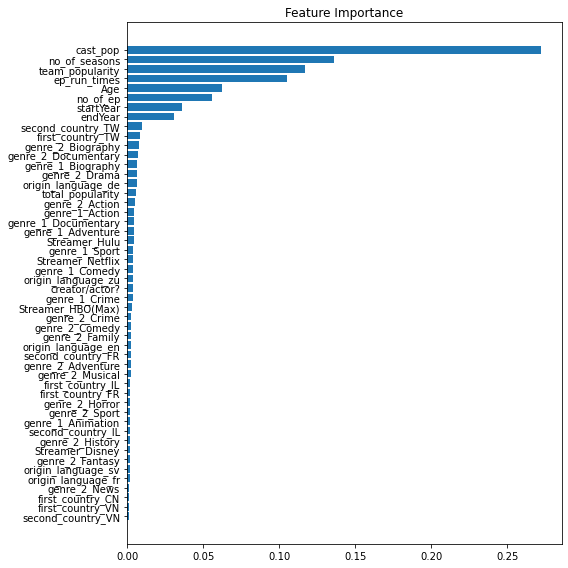

In [1270]:
from sklearn.inspection import permutation_importance

sorted_idx = np.argsort(feature_importances)
#sorting only top 50
top_50_indices = sorted_idx[-50:]


pos = np.arange(top_50_indices.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importances[top_50_indices], align='center')
plt.yticks(pos, np.array(df.columns)[top_50_indices])
plt.title('Feature Importance')
result = permutation_importance(random_tree, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
top_50_indices = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

It looks like Streamer and creator/actor? don't mean so much. Because our client is a French company the second country of production will be always France, So I'll drop that as well. I'll keep both of the genre columns because Fantasy genre is often shown in that column). 

not really. So I'll drop many columns.

In [1556]:
# Dropping Streamer columns as well
streamer_columns = [col for col in new_df.columns if 'Streamer' in col]

# Drop the columns
new_df = new_df.drop(columns=streamer_columns)

#checking
for col in new_df.columns:
    if 'Streamer' in col:
         print(new_df.columns)
    else:
         print('No Streamer Column was found')


No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Column was found
No Streamer Co

In [1557]:
# Name the words we are looking for.
words_to_search = ['second_country']

# Define columns that include any of the words in their names
columns_to_drop = [col for col in df.columns if any(word in col for word in words_to_search)]

# Drop the columns
new_df = df.drop(columns=columns_to_drop)
new_df.columns

Index(['startYear', 'endYear', 'Age', 'creator/actor?', 'ep_run_times',
       'no_of_ep', 'no_of_seasons', 'cast_pop', 'team_popularity',
       'total_popularity',
       ...
       'first_country_PT', 'first_country_SA', 'first_country_SE',
       'first_country_SG', 'first_country_TH', 'first_country_TR',
       'first_country_TW', 'first_country_US', 'first_country_VN',
       'first_country_ZA'],
      dtype='object', length=127)

Redoing train/test split:

In [1559]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_df.drop(columns = 'total_popularity'),new_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

In [1561]:
# Hyperparameters for RandomForestRegresser

param_grid2 ={'n_estimators': [5, 20, 50, 100], 
             'max_features': ['auto', 'sqrt'], 
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 
             'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 
             'bootstrap': [True, False]} 



In [1562]:
random_tree = RandomForestRegressor()
rf_par = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
rf_par.fit(new_X_train, new_y_train)
rf_par.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [1565]:
from sklearn.metrics import mean_absolute_percentage_error
# Create an instance of RandomForestRegressor
random = RandomForestRegressor(n_estimators = 50, max_features= 'sqrt',
                               max_depth= 110, min_samples_split = 2, min_samples_leaf = 1, bootstrap= False)
random_model = random.fit(new_X_train,new_y_train)
random_y_pred = random.predict(new_X_test)


In [1566]:
#Adjusted R-Squared:
# Calculate the regular R-squared
random_r2 = r2_score(new_y_test, random_y_pred)

# Get the number of observations (n) and predictors (k)
n = new_X_test.shape[0]
k = new_X_test.shape[1]

# Calculate the adjusted R-squared
random_adjusted_r2 = 1 - ((1 - random_r2) * (n - 1) / (n - k - 1))

print(f'R-squared: {round(random_r2,2)}')
print(f'Adjusted R-squared: {round(random_adjusted_r2,2)}')

R-squared: 0.52
Adjusted R-squared: 0.19


In [1567]:
#Mean Absolute Percentage Error
percent_error = (new_y_test - random_y_pred) / new_y_test

ab_percent_error = abs(percent_error)

random_mape = np.mean(ab_percent_error)
print ("Random Reg's MAPE % {}".format(round(random_mape *100,2)))


Random Reg's MAPE % 7.7


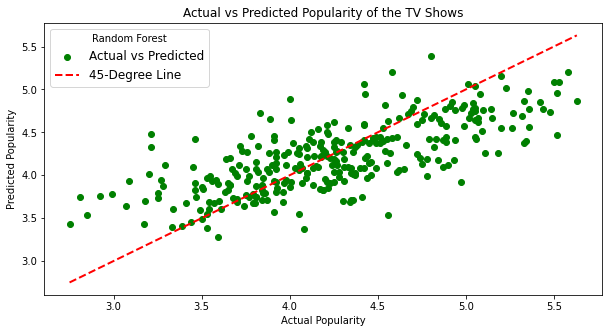

In [1568]:
plt.figure(figsize = (10,5))
plt.scatter(new_y_test, random_y_pred, color='green', label='Actual vs Predicted')

# The 45-degree red line
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend(prop={'size': 12}, title='Random Forest')

plt.show()

Histogram of Distribution of the Residuals:

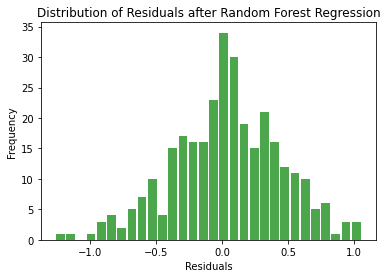

In [1569]:
random_residuals = np.array(new_y_test) - np.array(random_y_pred)

# Create a histogram of residuals
plt.hist(random_residuals, bins=30, color='green',alpha=0.7, rwidth=0.85 )

# Set labels and title
plt.title('Distribution of Residuals after Random Forest Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## 4.6 Random Forest Regression - Subsets Based on Time Periods <a id= '4.6_Random_Forest_Regression_-_Subsets_Based_on_Time_Periods' ><a>

Let's split the dataset into two subsets - one is showing Pre-pandemic Era (-2020) and the other Post-Pandemic Era (2020-2023)

In [1570]:
# Before 2020
pre_df = new_df[new_df['startYear'] < new_df['startYear'].max() - 3]

# Between 2020 and 2023

cov_df = new_df[new_df['startYear'] >= new_df['startYear'].max() - 3]

In [1571]:
#Train/Test Split
pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(pre_df.drop(columns = 'total_popularity'),pre_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

cov_X_train, cov_X_test, cov_y_train, cov_y_test = train_test_split(cov_df.drop(columns = 'total_popularity'),cov_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

In [1572]:
#Getting best parameters
# for pre-COVID
random_tree = RandomForestRegressor()
rf_par = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
rf_par.fit(pre_X_train, pre_y_train)
print('for pre-Covid:{}'.format(rf_par.best_params_))
#post COVID
rf_par = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
rf_par.fit(cov_X_train, cov_y_train)
print('for post-Covid:{}'.format(rf_par.best_params_))



for pre-Covid:{'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
for post-Covid:{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [1573]:
# Create an instance of RandomForestRegressor of Pre-COVID

pre_random = RandomForestRegressor(n_estimators = 20, min_samples_leaf = 4, max_features= 'auto',
                               max_depth= 60, min_samples_split = 6, bootstrap= True)
pre_random_model = pre_random.fit(pre_X_train,pre_y_train)
pre_y_pred = pre_random.predict(pre_X_test)

# Post-COVID
cov_random = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 3, max_features= 'sqrt',
                               max_depth= 20, min_samples_split = 2, bootstrap= False)
cov_random_model = cov_random.fit(cov_X_train,cov_y_train)
cov_y_pred = cov_random.predict(cov_X_test)


Calculation of R squared and Adjusted R squared:

In [1574]:
#For Pre-COVID
pre_random_r2 = r2_score(pre_y_test, pre_y_pred)

# Get the number of observations (n) and predictors (k)
n = pre_X_test.shape[0]
k = pre_X_test.shape[1]

# Calculate the adjusted R-squared
pre_random_adjusted_r2 = 1 - ((1 - pre_random_r2) * (n - 1) / (n - k - 1))

print(f'R-squared for Pre-COVID: {round(pre_random_r2,2)}')
print(f'Adjusted R-squared for Pre-COVID: {round(pre_random_adjusted_r2,2)}')

# For Post-COVID
# Calculate the regular R-squared
cov_random_r2 = r2_score(cov_y_test, cov_y_pred)

# Get the number of observations (n) and predictors (k)
n = cov_X_test.shape[0]
k = cov_X_test.shape[1]

# Calculate the adjusted R-squared
cov_random_adjusted_r2 = 1 - ((1 - cov_random_r2) * (n - 1) / (n - k - 1))

print(f'R-squared of Post-COVID: {round(cov_random_r2,2)}')
print(f'Adjusted R-squared for Post-COVID: {round(cov_random_adjusted_r2,2)}')

R-squared for Pre-COVID: 0.65
Adjusted R-squared for Pre-COVID: -2.07
R-squared of Post-COVID: 0.49
Adjusted R-squared for Post-COVID: -1.09


Mean Absolute Percentage Error:

In [1575]:
pre_random_mape = mean_absolute_percentage_error(pre_y_test, pre_y_pred)
cov_random_mape = mean_absolute_percentage_error(cov_y_test, cov_y_pred)
print ("Pre-COVID Random Reg's MAPE % {}".format(round(pre_random_mape *100,2)))

print ("POST-COVID Random Reg's MAPE % {}".format(round(cov_random_mape *100,2)))


Pre-COVID Random Reg's MAPE % 6.9
POST-COVID Random Reg's MAPE % 8.04


##Plotting Random Forest Regression for Pre and Post COVID Eras 

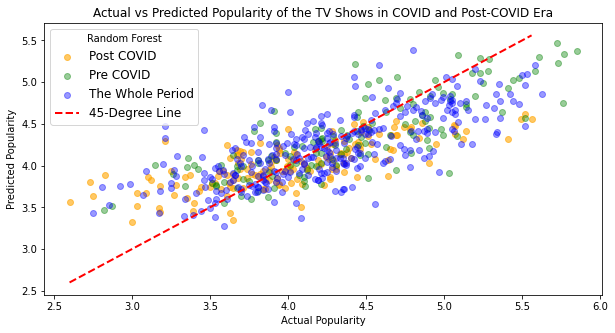

In [1576]:
plt.figure(figsize=(10, 5))

ax1 = plt.scatter(cov_y_test, cov_y_pred, color='orange', alpha = 0.6, label='Post COVID')
ax2 = plt.scatter(pre_y_test, pre_y_pred, color='green', alpha = 0.4, label='Pre COVID')

# comparing the subsets to the mainset and post COVID area have more predictability
ax3 = plt.scatter(new_y_test, random_y_pred, color='blue', alpha = 0.4, label='The Whole Period')

plt.plot([min(cov_y_test), max(cov_y_test)], [min(cov_y_test), max(cov_y_test)], linestyle='--', 
          color='red', linewidth= 2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows in COVID and Post-COVID Era')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend(prop={'size': 12}, title='Random Forest')

plt.show()

In [1577]:
cov_residuals = np.array(cov_y_test) - np.array(cov_y_pred)
pre_residuals = np.array(pre_y_test) - np.array(pre_y_pred)

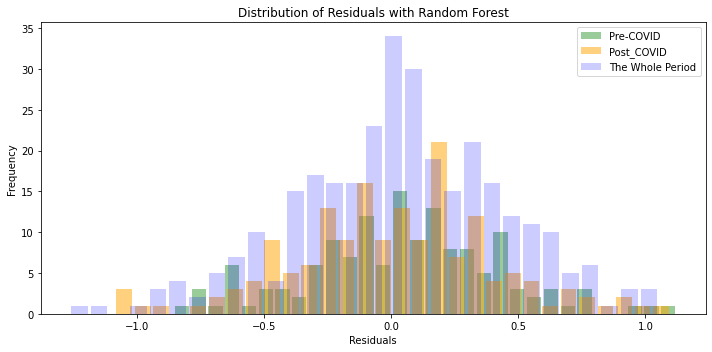

In [1578]:
plt.figure(figsize=(10, 5))
# Pre-Covid
ax1 =plt.hist(pre_residuals, bins=30, color='green', alpha=0.4, rwidth=0.85, label='Pre-COVID')
# Set labels and title

# Post-Covid
ax2=plt.hist(cov_residuals, bins=30, color='orange', alpha=0.5, rwidth=0.85, label='Post_COVID')
# Set labels and title
# the whole set
ax3=plt.hist(random_residuals, bins=30, color='blue', alpha=0.2, rwidth=0.85, label='The Whole Period')
# Set labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Residuals with Random Forest')
plt.tight_layout()
plt.show()

In the last years, the MAPE for popularity prediction is more. The residuals are more spread (shown in green.)

## 4.7 XGB Regression - Feature Importance <a id= '4.7_XGB_Regression_-_Feature_Importance'><a>

In [1579]:
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
feature_importances = xgboost.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

Feature ranking:
1. feature 6 (0.135979)
2. feature 170 (0.049754)
3. feature 66 (0.039176)
4. feature 7 (0.034734)
5. feature 33 (0.032839)
6. feature 54 (0.030276)
7. feature 2 (0.027123)
8. feature 31 (0.020918)
9. feature 23 (0.020714)
10. feature 74 (0.020264)
11. feature 10 (0.020066)
12. feature 53 (0.019673)
13. feature 11 (0.018315)
14. feature 8 (0.018245)
15. feature 4 (0.017756)
16. feature 100 (0.017103)
17. feature 26 (0.016037)
18. feature 57 (0.015769)
19. feature 78 (0.015703)
20. feature 123 (0.015349)
21. feature 15 (0.015313)
22. feature 95 (0.014938)
23. feature 81 (0.014024)
24. feature 62 (0.013689)
25. feature 35 (0.013669)
26. feature 3 (0.012121)
27. feature 87 (0.012006)
28. feature 29 (0.011462)
29. feature 9 (0.010881)
30. feature 125 (0.010618)
31. feature 39 (0.010469)
32. feature 45 (0.010421)
33. feature 38 (0.010014)
34. feature 84 (0.009982)
35. feature 13 (0.009140)
36. feature 76 (0.009085)
37. feature 5 (0.009032)
38. feature 94 (0.008959)
39. feat

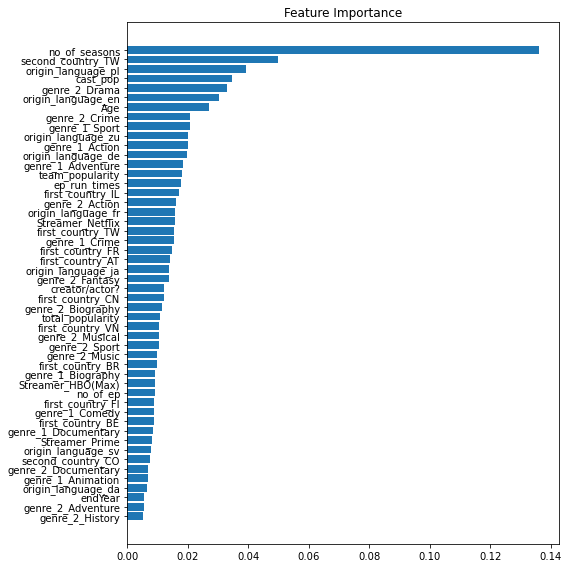

In [1580]:
sorted_idx = np.argsort(feature_importances)
#sorting only top 50
top_50_indices = sorted_idx[-50:]


pos = np.arange(top_50_indices.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importances[top_50_indices], align='center')
plt.yticks(pos, np.array(df.columns)[top_50_indices])
plt.title('Feature Importance')
result = permutation_importance(xgboost, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
top_50_indices = result.importances_mean.argsort()
plt.tight_layout()
plt.show()

The results are similar to Random Forest. So I'll continue with 'new_df'

In [1581]:
xgb_model2 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
par_search = RandomizedSearchCV(xgb_model2, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
par_search.fit(new_X_train, new_y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
  

In [1582]:
best_params = par_search.best_params_
print (best_params)

{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [1583]:
xgboost = xgb.XGBRegressor(n_estimators = 100, max_depth= 4, subsample = 1.0, learning_rate = 0.1, colsample_bytree = 1.0)
xgboost.fit(new_X_train,new_y_train)
xgb_y_pred = xgboost.predict(new_X_test)


In [1584]:
# Calculate the regular R-squared
xgb_r2 = r2_score(new_y_test, xgb_y_pred)

# Get the number of observations (n) and predictors (k)
n = new_X_test.shape[0]
k = new_X_test.shape[1]

# Calculate the adjusted R-squared
xgb_adjusted_r2 = 1 - ((1 - xgb_r2) * (n - 1) / (n - k - 1))

print(f'R-squared: {round(xgb_r2,2)}')
print(f'Adjusted R-squared: {round(xgb_adjusted_r2,2)}')

R-squared: 0.51
Adjusted R-squared: 0.18


In [1585]:
xgb_mape = mean_absolute_percentage_error(new_y_test, xgb_y_pred)
print ("XGBoost Reg's MAPE % {}".format(round(xgb_mape *100,2)))

XGBoost Reg's MAPE % 7.76


Actual-vs-Predicted scatter plots:

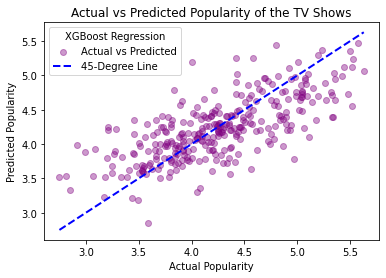

In [1586]:
plt.scatter(new_y_test, xgb_y_pred, color='purple', label='Actual vs Predicted', alpha = 0.4)

plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], linestyle='--', color='blue', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend(title='XGBoost Regression')

plt.show()

## 4.8 Comparison between XGB and Random Forest Models <a id= '4.8_Comparison_of_XGB_and_Random_Forest_Models' ><a>

Comparision of the residuals via histogram:

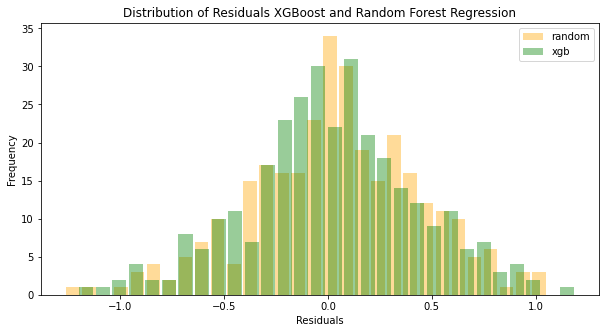

In [1587]:
xgb_residuals = np.array(new_y_test) - np.array(xgb_y_pred)

plt.figure(figsize = (10,5))
# Create a histogram of residuals
plt.hist(random_residuals, bins=30, color='orange',alpha=0.4, rwidth=0.85, label = 'random')
plt.hist(xgb_residuals, bins = 30, color = 'green', alpha=0.4, rwidth=0.85, label = 'xgb')
# Set labels and title
plt.title('Distribution of Residuals XGBoost and Random Forest Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

Via scatterplots:

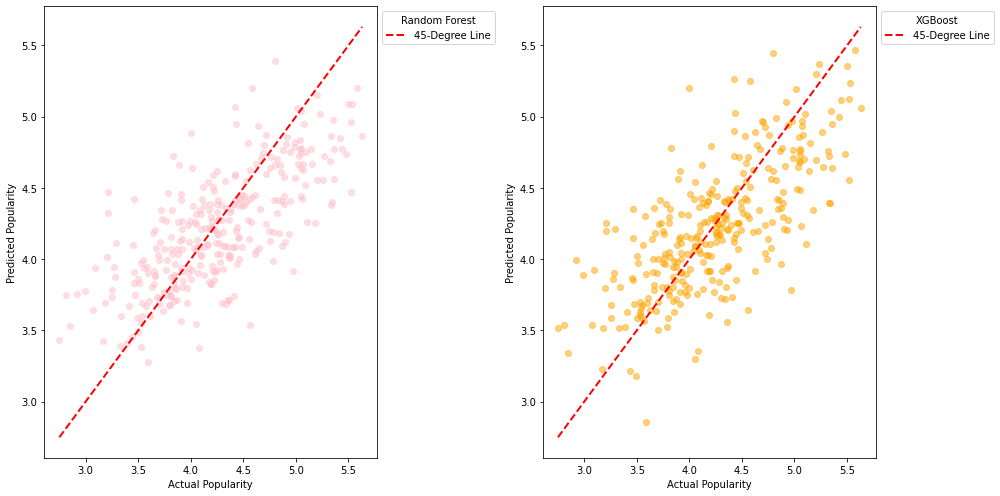

In [1588]:
random_y_pred = random.predict(new_X_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))


axes[0].scatter(new_y_test, random_y_pred, color='pink', alpha = 0.5)
axes[0].plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

axes[0].set_xlabel('Actual Popularity')
axes[0].set_ylabel('Predicted Popularity')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'Random Forest')
axes[1].scatter(new_y_test, xgb_y_pred, color='orange', alpha = 0.5)
axes[1].plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')
axes[1].set_xlabel('Actual Popularity')
axes[1].set_ylabel('Predicted Popularity')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'XGBoost')
plt.tight_layout()

They are close contenders.

## 4.9 XGB Regression - Subsets Based on Time Periods <a id= '4.9_XGB_Regression_-_Subsets_Based_on_Time_Periods' ><a>

Doing XGB for post covid and Pre-Covid:

In [1589]:
par_search.fit(pre_X_train, pre_y_train)
pre_best_params = par_search.best_params_
print('for pre-covid dataset: {}'.format(pre_best_params ))

for pre-covid dataset: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [1590]:
par_search.fit(cov_X_train, cov_y_train)
cov_best_params = par_search.best_params_
print('for covid dataset: {}'.format(cov_best_params ))

for covid dataset: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [1591]:
cov_xgboost = xgb.XGBRegressor(n_estimators = 100, colsample_bytee= 0.9,
                               max_depth= 4, subsample = 0.8, learning_rate = 0.1)

In [1592]:
pre_xgboost = xgb.XGBRegressor(n_estimators = 100, colsample_bytee= 0.8,
                               max_depth= 4, subsample = 0.8, learning_rate = 0.1)

In [1593]:
#fitting
cov_xgboost.fit(cov_X_train,cov_y_train)


/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytee=0.9,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [1594]:
#fitting
pre_xgboost.fit(pre_X_train,pre_y_train)


/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:01:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytee=0.8,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [1595]:
cov_xgb_y_pred = cov_xgboost.predict(cov_X_test)
pre_xgb_y_pred = pre_xgboost.predict(pre_X_test)

In [1596]:
#For Pre-COVID
pre_xgb_r2 = r2_score(pre_y_test, pre_xgb_y_pred)

# Get the number of observations (n) and predictors (k)
n = pre_X_test.shape[0]
k = pre_X_test.shape[1]

# Calculate the adjusted R-squared
pre_xgb_adjusted_r2 = 1 - ((1 - pre_xgb_r2) * (n - 1) / (n - k - 1))

print(f'R-squared for Pre-COVID: {round(pre_xgb_r2,2)}')
print(f'Adjusted R-squared for Pre-COVID: {round(pre_xgb_adjusted_r2,2)}')

# For Post-COVID
# Calculate the regular R-squared
cov_xgb_r2 = r2_score(cov_y_test, cov_xgb_y_pred)

# Get the number of observations (n) and predictors (k)
n = cov_X_test.shape[0]
k = cov_X_test.shape[1]

# Calculate the adjusted R-squared
cov_xgb_adjusted_r2 = 1 - ((1 - cov_xgb_r2) * (n - 1) / (n - k - 1))

print(f'XGB - R-squared of Post-COVID: {round(cov_xgb_r2,2)}')
print(f'XGB - Adjusted R-squared for Post-COVID: {round(cov_xgb_adjusted_r2,2)}')

R-squared for Pre-COVID: 0.62
Adjusted R-squared for Pre-COVID: -2.34
XGB - R-squared of Post-COVID: 0.49
XGB - Adjusted R-squared for Post-COVID: -1.09


In [1597]:
cov_xgb_mape = mean_absolute_percentage_error(cov_y_test, cov_xgb_y_pred)
print ("XGBoost Reg's MAPE for Post-Covid% {}".format(round(cov_xgb_mape *100,2)))

XGBoost Reg's MAPE for Post-Covid% 7.91


In [1598]:
pre_xgb_mape = mean_absolute_percentage_error(pre_y_test, pre_xgb_y_pred)
print ("XGBoost Reg's MAPE for Pre-Covid% {}".format(round(pre_xgb_mape *100,2)))

XGBoost Reg's MAPE for Pre-Covid% 7.43


XGBoost performes better for shows that are made pre COVID.

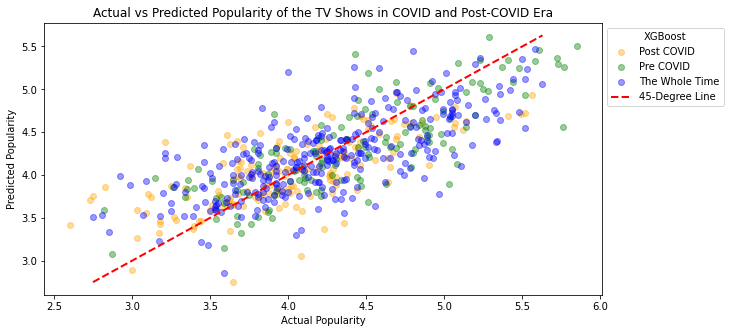

In [1599]:
plt.figure(figsize=(10, 5))

#making xgboost slightly more visible since it seems to perform the best
ax1 = plt.scatter(cov_y_test, cov_xgb_y_pred, color='orange', alpha = 0.4, label='Post COVID')
ax2 = plt.scatter(pre_y_test, pre_xgb_y_pred, color='green', alpha = 0.4, label='Pre COVID')

# comparing the subsets to the mainset and post COVID area have more predictability
ax3 = plt.scatter(new_y_test, xgb_y_pred, color='blue', alpha = 0.4, label='The Whole Time')

plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], linestyle='--', 
          color='red', linewidth= 2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows in COVID and Post-COVID Era')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'XGBoost')

plt.show()

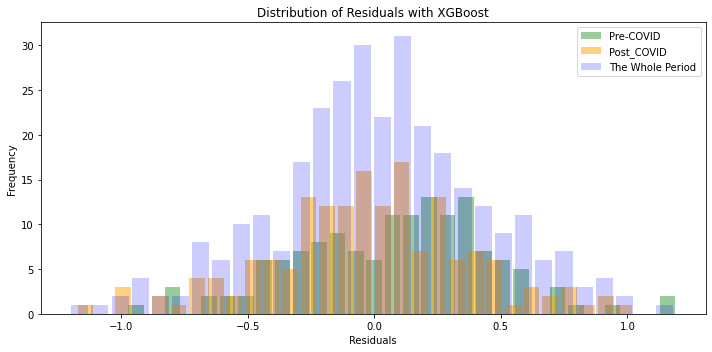

In [1600]:

cov_xgb_residuals = np.array(cov_y_test) - np.array(cov_xgb_y_pred)
pre_xgb_residuals = np.array(pre_y_test) - np.array(pre_xgb_y_pred)

plt.figure(figsize=(10, 5))
# Pre-Covid
ax1 =plt.hist(pre_xgb_residuals, bins=30, color='green', alpha=0.4, rwidth=0.85, label='Pre-COVID')
# Set labels and title

# Post-Covid
ax2=plt.hist(cov_xgb_residuals, bins=30, color='orange', alpha=0.5, rwidth=0.85, label='Post_COVID')
# Set labels and title

# the whole set
ax3=plt.hist(xgb_residuals, bins=30, color='blue', alpha=0.2, rwidth=0.85, label='The Whole Period')
# Set labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.title('Distribution of Residuals with XGBoost')
plt.legend()
plt.tight_layout()
plt.show()

## 4.10 Subsetting Based on Genres and Modeling <a id= '4.10_Subsetting_Based_on_Genres_and_Modeling'><a>

When I look at the feature importances, some genres such as Crime, Drama, Adventure, Action and Biography stand out.

For the sake of variety I'll look into genres, Crime, Action, Biography and Fantasy. I'll also use random forest regression only since searching best parameters take so much time in xgboost...

In [1601]:
bio_df = new_df[new_df['genre_1_Biography'] == 1]
#making sure the dramas don't overlap with fantasy genre
bio_df = bio_df[bio_df['genre_2_Fantasy'] == 0]
bio_df.head()

,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,first_country_PT,first_country_SA,first_country_SE,first_country_SG,first_country_TH,first_country_TR,first_country_TW,first_country_US,first_country_VN,first_country_ZA
7,2015,2017,18,0,57,30,3,74.9,2.9,5.58,...,0,0,0,0,0,0,0,1,0,0
51,2020,2021,7,0,40,18,1,21.2,2.1,4.20,...,0,0,0,0,0,0,0,1,0,0
124,2019,2019,18,0,75,4,1,8.5,5.0,5.38,...,0,0,0,0,0,0,0,1,0,0
127,2020,2020,18,0,47,4,1,21.8,1.7,4.53,...,0,0,0,0,0,0,0,1,0,0
131,2021,2021,18,0,47,5,1,56.3,2.2,4.53,...,0,0,0,0,0,0,0,1,0,0


In [1602]:
drama_df = new_df[new_df['genre_1_Drama'] == 1]
#making sure the dramas don't overlap with fantasy genre
drama_df = drama_df[drama_df['genre_2_Fantasy'] == 0]
drama_df.head()


,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,first_country_PT,first_country_SA,first_country_SE,first_country_SG,first_country_TH,first_country_TR,first_country_TW,first_country_US,first_country_VN,first_country_ZA
0,2013,2018,18,0,73,73,6,31.0,7.6,5.76,...,0,0,0,0,0,0,0,1,0,0
4,2015,2017,18,0,60,33,3,33.6,2.1,5.01,...,0,0,0,0,0,0,0,1,0,0
6,2015,2018,18,0,60,24,2,24.8,11.8,5.25,...,0,0,0,0,0,0,0,1,0,0
9,2016,2017,18,0,52,11,1,31.3,2.2,4.79,...,0,0,0,0,0,0,0,1,0,0
14,2017,2020,18,0,57,49,4,15.2,3.5,5.07,...,0,0,0,0,0,0,0,1,0,0


In [1603]:
act_df = df[df['genre_1_Action'] == 1]
#making sure the action genres don't overlap with fantasy genre
act_df = act_df[act_df['genre_2_Fantasy'] == 0]
act_df.head()


,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,second_country_PT,second_country_SA,second_country_SE,second_country_TH,second_country_TN,second_country_TR,second_country_TW,second_country_US,second_country_VN,second_country_ZA
3,2014,2016,18,0,60,20,2,21.4,2.2,5.04,...,0,0,0,0,0,0,0,1,0,0
5,2015,2018,18,0,52,39,3,38.9,5.5,5.61,...,0,0,0,0,0,0,0,1,0,0
8,2015,2019,18,0,52,39,3,37.5,2.7,5.19,...,0,0,0,0,0,0,0,1,0,0
10,2016,2018,18,0,46,26,2,23.0,2.4,4.91,...,0,0,0,0,0,0,0,1,0,0
13,2017,2018,18,0,55,23,2,38.7,3.5,4.51,...,0,0,0,0,0,0,0,1,0,0


In [1604]:
crime_df = new_df[new_df['genre_1_Crime'] == 1]
#making sure the action genres don't overlap with fantasy genre
crime_df = crime_df[crime_df['genre_2_Fantasy'] == 0]
crime_df.head()

,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,first_country_PT,first_country_SA,first_country_SE,first_country_SG,first_country_TH,first_country_TR,first_country_TW,first_country_US,first_country_VN,first_country_ZA
18,2017,2019,18,0,50,19,2,19.4,8.1,5.48,...,0,0,0,0,0,0,0,1,0,0
21,2018,2018,18,0,55,10,1,18.8,2.4,4.79,...,0,0,0,0,0,0,0,1,0,0
26,2018,2021,18,0,50,30,3,33.8,2.7,5.13,...,0,0,0,0,0,0,0,1,0,0
27,2018,2018,18,0,60,8,1,18.0,1.0,4.16,...,0,0,0,0,0,0,0,0,0,0
35,2019,2020,18,0,43,7,2,22.5,2.6,4.62,...,0,0,0,0,0,0,0,0,0,0


In [1605]:
comedy_df = new_df[new_df['genre_1_Comedy'] == 1]
#making sure the comedy don't overlap with fantasy genre
comedy_df = comedy_df[comedy_df['genre_2_Fantasy'] == 0]
comedy_df.head()


,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,first_country_PT,first_country_SA,first_country_SE,first_country_SG,first_country_TH,first_country_TR,first_country_TW,first_country_US,first_country_VN,first_country_ZA
2,2013,2019,18,0,60,91,7,20.4,3.7,5.32,...,0,0,0,0,0,0,0,1,0,0
32,2019,2020,18,0,25,20,2,44.4,1.0,4.29,...,0,0,0,0,0,0,0,1,0,0
36,2019,2019,14,0,65,8,1,16.6,8.7,4.17,...,0,0,0,0,0,0,0,1,0,0
53,2021,2021,13,0,35,10,1,7.6,1.4,3.45,...,0,0,0,0,0,0,0,0,0,0
58,2015,2015,7,0,21,21,2,16.2,1.8,2.82,...,0,0,0,0,0,0,0,1,0,0


For Fantasy, we use 2nd genre since Fantasy appears as a second genre on the dataset

In [1606]:
fan_df = new_df[new_df['genre_2_Fantasy'] == 1]
fan_df.head()

,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,first_country_PT,first_country_SA,first_country_SE,first_country_SG,first_country_TH,first_country_TR,first_country_TW,first_country_US,first_country_VN,first_country_ZA
1,2013,2015,18,0,60,33,3,38.4,2.4,4.58,...,0,0,0,0,0,0,0,1,0,0
11,2016,2019,18,0,60,16,2,38.2,5.2,5.01,...,0,0,0,0,0,0,0,1,0,0
25,2018,2020,14,0,60,36,2,32.7,2.3,4.88,...,0,0,0,0,0,0,0,1,0,0
28,2019,2020,18,0,50,20,2,20.1,3.9,4.38,...,0,0,0,0,0,0,0,1,0,0
29,2019,2019,18,0,60,10,1,6.6,2.2,4.09,...,0,0,0,0,0,0,0,1,0,0


In [1607]:
crime_X_train, crime_X_test, crime_y_train, crime_y_test = train_test_split(crime_df.drop(columns = 'total_popularity'),
                                                                            crime_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

act_X_train, act_X_test, act_y_train, act_y_test = train_test_split(act_df.drop(columns = 'total_popularity'),act_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

drama_X_train, drama_X_test, drama_y_train, drama_y_test = train_test_split(drama_df.drop(columns = 'total_popularity'),drama_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

bio_X_train, bio_X_test, bio_y_train, bio_y_test = train_test_split(bio_df.drop(columns = 'total_popularity'),bio_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)


comedy_X_train, comedy_X_test, comedy_y_train, comedy_y_test = train_test_split(comedy_df.drop(columns = 'total_popularity'),comedy_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

fan_X_train, fan_X_test, fan_y_train, fan_y_test = train_test_split(fan_df.drop(columns = 'total_popularity'),fan_df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)

## 4.10.1 Crime <a id= '4.10.1_Crime' ><a>

XGBOOST REGRESSION:

In [1608]:
xgboost = xgb.XGBRegressor()
crime_xgb = RandomizedSearchCV(xgboost, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
crime_xgb.fit(crime_X_train, crime_y_train)
crime_xgb.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 1.0}

In [1611]:
crime_xgboost = xgb.XGBRegressor(n_estimators = 300, colsample_bytee= 0.9,
                               max_depth= 5, subsample = 0.9, learning_rate = 0.01)

In [1612]:
#Make predictions
crime_xgboost.fit(crime_X_train,crime_y_train)

crime_xgb_pred = crime_xgboost.predict(crime_X_test)

# Calculate the regular R-squared
crime_xgb_r2 = r2_score(crime_y_test, crime_xgb_pred)

# Get the number of observations (n) and predictors (k)
n = crime_X_test.shape[0]
k = crime_X_test.shape[1]

# Calculate the adjusted R-squared
crime_xgb_adjusted_r2 = 1 - ((1 - crime_xgb_r2) * (n - 1) / (n - k - 1))

print(f'R-squared of Crime Genre - XGB: {round(crime_xgb_r2,2)}')
print(f'Adjusted R-squared Crime Genre - XGB: {round(crime_xgb_adjusted_r2,2)}')

crime_xgb_mape = mean_absolute_percentage_error(crime_y_test, crime_xgb_pred)
print ("Crime - XGB Reg's MAPE % {}".format(round(crime_xgb_mape *100,2)))


/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)


R-squared of Crime Genre - XGB: 0.53
Adjusted R-squared Crime Genre - XGB: 1.22
Crime - XGB Reg's MAPE % 9.31


There is no improvement with Crime Dataset and xgb regressor.

RANDOM FOREST REGRESSION:

In [1613]:
random_tree = RandomForestRegressor()
cr_random = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
cr_random.fit(crime_X_train, crime_y_train)
cr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [1614]:
crime_random = RandomForestRegressor(n_estimators = 100, min_samples_split= 2,
                               max_depth= 50, min_samples_leaf = 4, max_features = 'auto', bootstrap = True)
crime_random.fit(crime_X_train, crime_y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=4)

In [1615]:
#Make predictions

crime_random_pred = crime_random.predict(crime_X_test)

# Calculate the regular R-squared
crime_random_r2 = r2_score(crime_y_test, crime_random_pred)

# Get the number of observations (n) and predictors (k)
n = crime_X_test.shape[0]
k = crime_X_test.shape[1]

# Calculate the adjusted R-squared
crime_random_adjusted_r2 = 1 - ((1 - crime_random_r2) * (n - 1) / (n - k - 1))
# Calculate MAPE
crime_random_mape = mean_absolute_percentage_error(crime_y_test, crime_random_pred)

print(f'R-squared of Crime Genre - Random Forest: {round(crime_random_r2,2)}')
print(f'Adjusted R-squared Crime Genre -Random Forest: {round(crime_random_adjusted_r2,2)}')
print ("Crime - Random Forest's Reg's MAPE % {}".format(round(crime_random_mape *100,2)))

R-squared of Crime Genre - Random Forest: 0.51
Adjusted R-squared Crime Genre -Random Forest: 1.23
Crime - Random Forest's Reg's MAPE % 9.44


PLOTTING THE RESULTS:

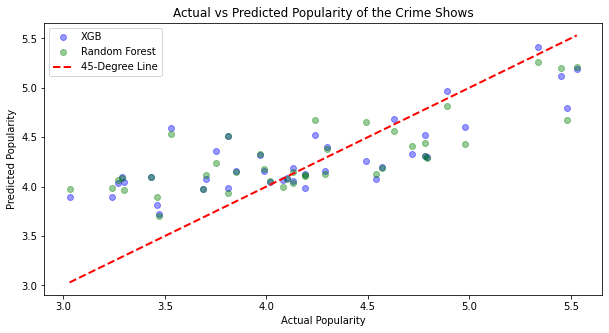

In [1616]:
plt.figure(figsize=(10, 5))

plt.scatter(crime_y_test, crime_xgb_pred, color='blue', label='XGB', alpha = 0.4)
plt.scatter(crime_y_test, crime_random_pred, color='green', label='Random Forest', alpha = 0.4)
# The 45-degree red line
plt.plot([min(crime_y_test), max(crime_y_test)], [min(crime_y_test), max(crime_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the Crime Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

Histogram of Distribution of the Residuals:

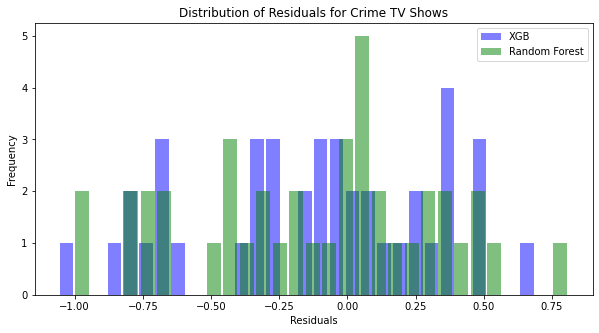

In [1617]:
crime_xgb_residuals = np.array(crime_y_test) - np.array(crime_xgb_pred)
crime_random_residuals = np.array(crime_y_test) - np.array(crime_random_pred)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(crime_xgb_residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'XGB' )

# Create a histogram of residuals
ax2 = plt.hist(crime_random_residuals, bins=30, color='green',alpha=0.5, rwidth=0.85, label = 'Random Forest' )


# Set labels and title
plt.title('Distribution of Residuals for Crime TV Shows')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

The MAPE for crime genre is higher than the general MAPE.

## 4.10.2 Biography <a id= '4.10.2_Biography'><a>

XGB REGRESSION:

In [1618]:
b_xgb = RandomizedSearchCV(xgboost, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
b_xgb.fit(bio_X_train, bio_y_train)
b_xgb.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'max_depth': 4,
 'learning_rate': 0.2,
 'colsample_bytree': 0.9}

In [1619]:
bio_xgb = xgb.XGBRegressor(subsample= 0.8, n_estimators= 300, max_depth= 4,learning_rate= 0.2,
                                 colsample_bytree= 0.9)
bio_xgb.fit(bio_X_train,bio_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1620]:
#Make predictions
bio_xgb_pred = bio_xgb.predict(bio_X_test)

# Calculate the regular R-squared
bio_xgb_r2 = r2_score(bio_y_test, bio_xgb_pred)

# Get the number of observations (n) and predictors (k)
n = bio_X_test.shape[0]
k = bio_X_test.shape[1]

# Calculate the adjusted R-squared
bio_xgb_adjusted_r2 = 1 - ((1 - bio_xgb_r2) * (n - 1) / (n - k - 1))
bio_xgb_mape = mean_absolute_percentage_error(bio_y_test, bio_xgb_pred)
print(f'R-squared of Bio Genre - XGB: {round(bio_xgb_r2,2)}')
print(f'Adjusted R-squared Bio Genre - XGB: {round(bio_xgb_adjusted_r2,2)}')
print ("Bio - XGB Reg's MAPE % {}".format(round(bio_xgb_mape *100,2)))


R-squared of Bio Genre - XGB: -0.06
Adjusted R-squared Bio Genre - XGB: 1.1
Bio - XGB Reg's MAPE % 8.85


RANDOM FOREST REGRESSION:

Hyperparameter Tuning:

In [1621]:
# Calculating best hyperparameters
b_random = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
b_random.fit(bio_X_train, bio_y_train)
b_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [1622]:
bio_random = RandomForestRegressor(n_estimators= 100, max_depth= 70, min_samples_leaf = 4,
                                   max_features= 'auto', min_samples_split = 6, bootstrap = True)
# fitting
bio_random.fit(bio_X_train,bio_y_train)


RandomForestRegressor(max_depth=70, min_samples_leaf=4, min_samples_split=6)

In [1623]:
# prediction
bio_random_pred = bio_random.predict(bio_X_test)


# Calculate the regular R-squared
bio_random_r2 = r2_score(bio_y_test, bio_random_pred)

# Get the number of observations (n) and predictors (k)
n = bio_X_test.shape[0]
k = bio_X_test.shape[1]

# Calculate the adjusted R-squared
bio_random_adjusted_r2 = 1 - ((1 - bio_random_r2) * (n - 1) / (n - k - 1))

# Calculate MAPE
bio_random_mape = mean_absolute_percentage_error(bio_y_test, bio_random_pred)

print(f'R-squared of Bio Genre - Random Forest: {round(bio_random_r2,2)}')
print(f'Adjusted R-squared Bio Genre - Random Forest: {round(bio_random_adjusted_r2,2)}')
print ("Bio - Random Forest Reg's MAPE % {}".format(round(bio_random_mape *100,2)))



R-squared of Bio Genre - Random Forest: 0.36
Adjusted R-squared Bio Genre - Random Forest: 1.06
Bio - Random Forest Reg's MAPE % 6.57


The predictability of Bio Genres are better.

PLOTTING THE RESULTS:

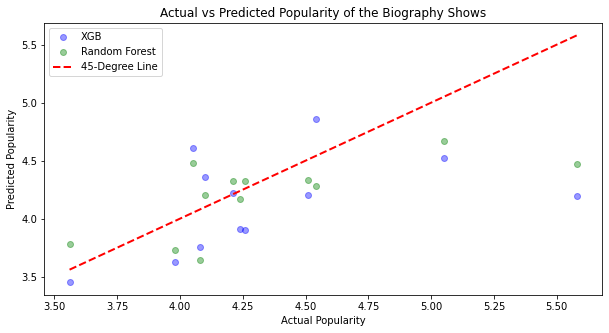

In [1624]:
# Scatterplotting the two models for Biography Shows
plt.figure(figsize=(10, 5))

plt.scatter(bio_y_test, bio_xgb_pred, color='blue', label='XGB', alpha = 0.4)
plt.scatter(bio_y_test, bio_random_pred, color='green', label='Random Forest', alpha = 0.4)
# The 45-degree red line
plt.plot([min(bio_y_test), max(bio_y_test)], [min(bio_y_test), max(bio_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the Biography Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

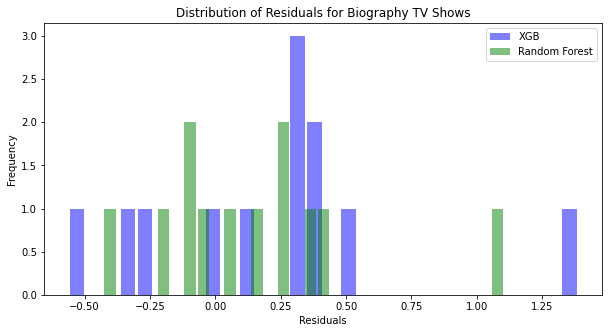

In [1625]:
bio_xgb_residuals = np.array(bio_y_test) - np.array(bio_xgb_pred)
bio_random_residuals = np.array(bio_y_test) - np.array(bio_random_pred)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(bio_xgb_residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'XGB' )

# Create a histogram of residuals
ax2 = plt.hist(bio_random_residuals, bins=30, color='green',alpha=0.5, rwidth=0.85, label = 'Random Forest' )


# Set labels and title
plt.title('Distribution of Residuals for Biography TV Shows')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

There are not many biography shows to make a good prediction although the MAPE has a satisfactory score.

## 4.10.3 Action <a id= '4.10.3_Action'><a>

XGB REGRESSION:

In [1626]:
# Calculating best hyperparameters
a_xgb = RandomizedSearchCV(xgboost, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
a_xgb.fit(act_X_train, act_y_train)
a_xgb.best_params_

{'subsample': 0.9,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

In [1627]:
act_xgb = xgb.XGBRegressor(subsample= 0.9, n_estimators= 100, max_depth= 3,learning_rate= 0.1,
                                 colsample_bytree= 0.9)
act_xgb.fit(act_X_train, act_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1628]:
#Make predictions

act_xgb_pred = act_xgb.predict(act_X_test)

# Calculate the regular R-squared
act_xgb_r2 = r2_score(act_y_test, act_xgb_pred)

# Get the number of observations (n) and predictors (k)
n = act_X_test.shape[0]
k = act_X_test.shape[1]

# Calculate the adjusted R-squared
act_xgb_adjusted_r2 = 1 - ((1 - act_xgb_r2) * (n - 1) / (n - k - 1))
act_xgb_mape = mean_absolute_percentage_error(act_y_test, act_xgb_pred)
print(f'R-squared of Action Genre - XGB: {round(act_xgb_r2,2)}')
print(f'Adjusted R-squared Action Genre - XGB: {round(act_xgb_adjusted_r2,2)}')
print ("Action - XGB Reg's MAPE % {}".format(round(act_xgb_mape *100,2)))

R-squared of Action Genre - XGB: 0.37
Adjusted R-squared Action Genre - XGB: 1.35
Action - XGB Reg's MAPE % 8.57


RANDOM FOREST REGRESSION:

In [1629]:
# Calculating best hyperparameters
a_random = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
a_random.fit(act_X_train, act_y_train)
a_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [1630]:
# Hyperparameter Tuning
act_random = RandomForestRegressor(n_estimators= 50, max_depth= 20, min_samples_leaf = 1,
                                   max_features= 'sqrt', min_samples_split = 2, bootstrap = False)
# fitting
act_random.fit(act_X_train, act_y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=50)

In [1631]:
# prediction
act_random_pred = act_random.predict(act_X_test)


# Calculate the regular R-squared
act_random_r2 = r2_score(act_y_test, act_random_pred)

# Get the number of observations (n) and predictors (k)
n = act_X_test.shape[0]
k = act_X_test.shape[1]

# Calculate the adjusted R-squared
act_random_adjusted_r2 = 1 - ((1 - act_random_r2) * (n - 1) / (n - k - 1))

# Calculate MAPE
act_random_mape = mean_absolute_percentage_error(act_y_test, act_random_pred)

print(f'R-squared of Action Genre - Random Forest: {round(act_random_r2,2)}')
print(f'Adjusted R-squared Action Genre - Random Forest: {round(act_random_adjusted_r2,2)}')
print ("Action - Random Forest Reg's MAPE % {}".format(round(act_random_mape *100,2)))

R-squared of Action Genre - Random Forest: 0.36
Adjusted R-squared Action Genre - Random Forest: 1.36
Action - Random Forest Reg's MAPE % 8.75


PLOTTING THE RESULTS:

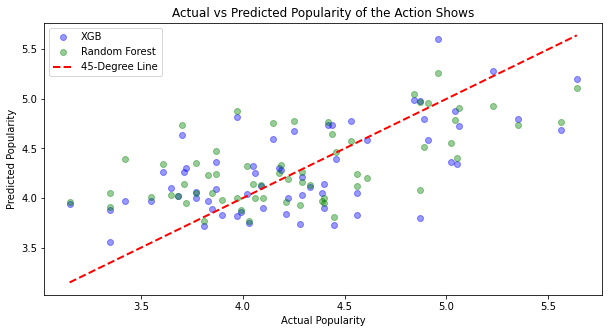

In [1632]:
# Scatterplotting the two models for Biography Shows
plt.figure(figsize=(10, 5))

plt.scatter(act_y_test, act_xgb_pred, color='blue', label='XGB', alpha = 0.4)
plt.scatter(act_y_test, act_random_pred, color='green', label='Random Forest', alpha = 0.4)
# The 45-degree red line
plt.plot([min(act_y_test), max(act_y_test)], [min(act_y_test), max(act_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the Action Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

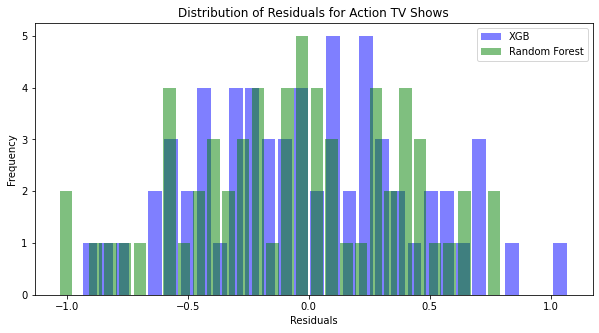

In [1633]:
#Residuals
act_xgb_residuals = np.array(act_y_test) - np.array(act_xgb_pred)
act_random_residuals = np.array(act_y_test) - np.array(act_random_pred)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(act_xgb_residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'XGB' )

# Create a histogram of residuals
ax2 = plt.hist(act_random_residuals, bins=30, color='green',alpha=0.5, rwidth=0.85, label = 'Random Forest' )


# Set labels and title
plt.title('Distribution of Residuals for Action TV Shows')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

## 4.10.4 Drama <a id= '4.10.4_Drama'><a>

XGB REGRESSION:

In [1634]:
# Calculating best hyperparameters
d_xgb = RandomizedSearchCV(xgboost, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
d_xgb.fit(drama_X_train, drama_y_train)
d_xgb.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'max_depth': 4,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [1635]:
drama_xgb = xgb.XGBRegressor(subsample= 0.9, n_estimators= 300, max_depth= 4,learning_rate= 0.1,
                                 colsample_bytree= 0.8)
drama_xgb.fit(drama_X_train, drama_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1636]:
#Make predictions
drama_xgb_pred = drama_xgb.predict(drama_X_test)

# Calculate the regular R-squared
drama_xgb_r2 = r2_score(act_y_test, act_xgb_pred)

# Get the number of observations (n) and predictors (k)
n = drama_X_test.shape[0]
k = drama_X_test.shape[1]

# Calculate the adjusted R-squared
drama_xgb_adjusted_r2 = 1 - ((1 - drama_xgb_r2) * (n - 1) / (n - k - 1))
drama_xgb_mape = mean_absolute_percentage_error(drama_y_test, drama_xgb_pred)
print(f'R-squared of Drama Genre - XGB: {round(drama_xgb_r2,2)}')
print(f'Adjusted R-squared Drama Genre - XGB: {round(drama_xgb_adjusted_r2,2)}')
print ("Drama - XGB Reg's MAPE % {}".format(round(drama_xgb_mape *100,2)))

R-squared of Drama Genre - XGB: 0.37
Adjusted R-squared Drama Genre - XGB: 1.47
Drama - XGB Reg's MAPE % 7.57


RANDOM FOREST REGRESSION:

In [1637]:
# Calculating best hyperparameters
d_random = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
d_random.fit(drama_X_train, drama_y_train)
d_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [1638]:
# Hyperparameter Tuning
drama_random = RandomForestRegressor(n_estimators= 100, max_depth= 100, min_samples_leaf = 3,
                                   max_features= 'auto', min_samples_split = 2, bootstrap = True)
# fitting
drama_random.fit(drama_X_train, drama_y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=3)

In [1639]:
# prediction
drama_random_pred = drama_random.predict(drama_X_test)


# Calculate the regular R-squared
drama_random_r2 = r2_score(drama_y_test, drama_random_pred)

# Get the number of observations (n) and predictors (k)
n = drama_X_test.shape[0]
k = drama_X_test.shape[1]

# Calculate the adjusted R-squared
drama_random_adjusted_r2 = 1 - ((1 - drama_random_r2) * (n - 1) / (n - k - 1))

# Calculate MAPE
drama_random_mape = mean_absolute_percentage_error(drama_y_test, drama_random_pred)

print(f'R-squared of Drama Genre - Random Forest: {round(drama_random_r2,2)}')
print(f'Adjusted R-squared Drama Genre - Random Forest: {round(drama_random_adjusted_r2,2)}')
print ("Drama - Random Forest Reg's MAPE % {}".format(round(drama_random_mape *100,2)))

R-squared of Drama Genre - Random Forest: 0.59
Adjusted R-squared Drama Genre - Random Forest: 1.31
Drama - Random Forest Reg's MAPE % 7.06


There is an improvement in predictions when it is a drama.

PLOTTING THE RESULTS:

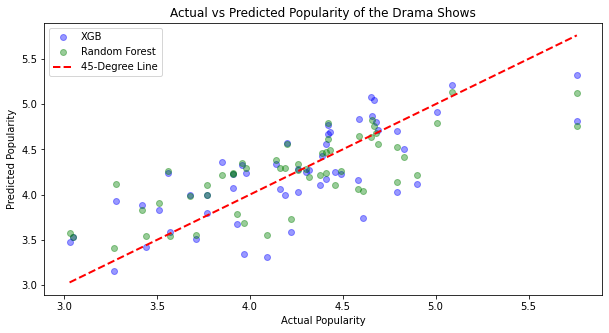

In [1640]:
#Scatterplotting the two models for Biography Shows
plt.figure(figsize=(10, 5))

plt.scatter(drama_y_test, drama_xgb_pred, color='blue', label='XGB', alpha = 0.4)
plt.scatter(drama_y_test, drama_random_pred, color='green', label='Random Forest', alpha = 0.4)
# The 45-degree red line
plt.plot([min(drama_y_test), max(drama_y_test)], [min(drama_y_test), max(drama_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the Drama Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

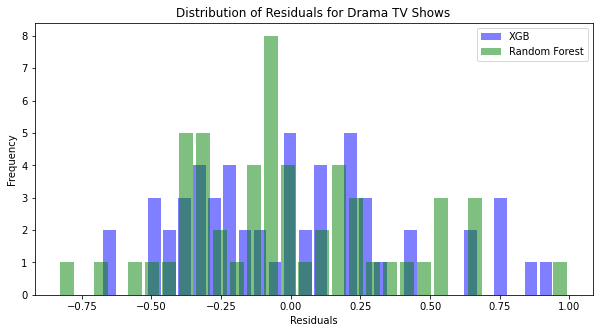

In [1641]:
#Residuals
drama_xgb_residuals = np.array(drama_y_test) - np.array(drama_xgb_pred)
drama_random_residuals = np.array(drama_y_test) - np.array(drama_random_pred)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(drama_xgb_residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'XGB' )

# Create a histogram of residuals
ax2 = plt.hist(drama_random_residuals, bins=30, color='green',alpha=0.5, rwidth=0.85, label = 'Random Forest' )


# Set labels and title
plt.title('Distribution of Residuals for Drama TV Shows')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

## 4.10.5 Comedy <a id= '4.10.5_Comedy'><a>

XGB REGRESSION:

In [1642]:
# Calculating best hyperparameters
co_xgb = RandomizedSearchCV(xgboost, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
co_xgb.fit(comedy_X_train, comedy_y_train)
co_xgb.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

In [1643]:
comedy_xgb = xgb.XGBRegressor(subsample= 0.9, n_estimators= 200, max_depth= 5,learning_rate= 0.01,
                                 colsample_bytree= 0.8)
comedy_xgb.fit(comedy_X_train, comedy_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1644]:
#Make predictions
comedy_xgb_pred = comedy_xgb.predict(comedy_X_test)

# Calculate the regular R-squared
comedy_xgb_r2 = r2_score(comedy_y_test, comedy_xgb_pred)

# Get the number of observations (n) and predictors (k)
n = comedy_X_test.shape[0]
k = comedy_X_test.shape[1]

# Calculate the adjusted R-squared
comedy_xgb_adjusted_r2 = 1 - ((1 - comedy_xgb_r2) * (n - 1) / (n - k - 1))
comedy_xgb_mape = mean_absolute_percentage_error(comedy_y_test, comedy_xgb_pred)
print(f'R-squared of Comedy Genre - XGB: {round(drama_xgb_r2,2)}')
print(f'Adjusted R-squared Comedy Genre - XGB: {round(drama_xgb_adjusted_r2,2)}')
print ("Comedy - XGB Reg's MAPE % {}".format(round(drama_xgb_mape *100,2)))

R-squared of Comedy Genre - XGB: 0.37
Adjusted R-squared Comedy Genre - XGB: 1.47
Comedy - XGB Reg's MAPE % 7.57


RANDOM FOREST REGRESSION:

In [1646]:
# Calculating best hyperparameters
co_random = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
co_random.fit(comedy_X_train, comedy_y_train)
co_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [1647]:
# Hyperparameter Tuning
comedy_random = RandomForestRegressor(n_estimators= 50, max_depth= 50, min_samples_leaf = 1,
                                   max_features= 'sqrt', min_samples_split = 6, bootstrap = False)
# fitting
comedy_random.fit(comedy_X_train, comedy_y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=6, n_estimators=50)

In [1648]:
# prediction
comedy_random_pred = comedy_random.predict(comedy_X_test)


# Calculate the regular R-squared
comedy_random_r2 = r2_score(comedy_y_test, comedy_random_pred)

# Get the number of observations (n) and predictors (k)
n = comedy_X_test.shape[0]
k = comedy_X_test.shape[1]

# Calculate the adjusted R-squared
comedy_random_adjusted_r2 = 1 - ((1 - comedy_random_r2) * (n - 1) / (n - k - 1))

# Calculate MAPE
comedy_random_mape = mean_absolute_percentage_error(comedy_y_test, comedy_random_pred)

print(f'R-squared of Comedy Genre - Random Forest: {round(comedy_random_r2,2)}')
print(f'Adjusted R-squared Comedy Genre - Random Forest: {round(comedy_random_adjusted_r2,2)}')
print ("Comedy - Random Forest Reg's MAPE % {}".format(round(comedy_random_mape *100,2)))

R-squared of Comedy Genre - Random Forest: 0.55
Adjusted R-squared Comedy Genre - Random Forest: 1.87
Comedy - Random Forest Reg's MAPE % 9.01


PLOTTING THE RESULTS:

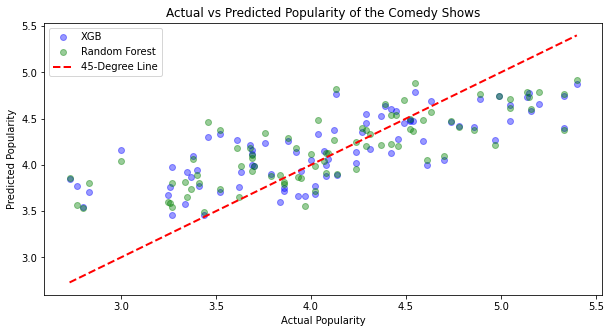

In [1649]:
#Scatterplotting the two models for Biography Shows
plt.figure(figsize=(10, 5))

plt.scatter(comedy_y_test, comedy_xgb_pred, color='blue', label='XGB', alpha = 0.4)
plt.scatter(comedy_y_test, comedy_random_pred, color='green', label='Random Forest', alpha = 0.4)
# The 45-degree red line
plt.plot([min(comedy_y_test), max(comedy_y_test)], [min(comedy_y_test), max(comedy_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the Comedy Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

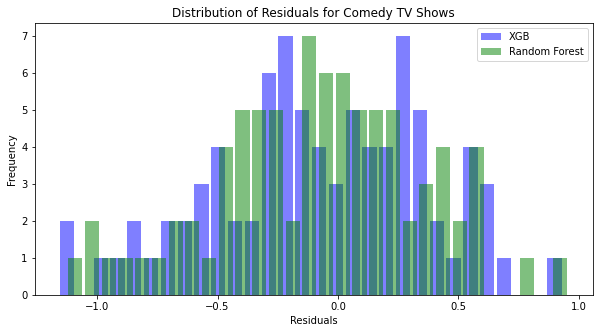

In [1650]:
#Residuals
comedy_xgb_residuals = np.array(comedy_y_test) - np.array(comedy_xgb_pred)
comedy_random_residuals = np.array(comedy_y_test) - np.array(comedy_random_pred)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(comedy_xgb_residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'XGB' )

# Create a histogram of residuals
ax2 = plt.hist(comedy_random_residuals, bins=30, color='green',alpha=0.5, rwidth=0.85, label = 'Random Forest' )


# Set labels and title
plt.title('Distribution of Residuals for Comedy TV Shows')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

## 4.10.6 Fantasy <a id= '4.10.6_Fantasy'><a> 

XGB REGRESSION:

In [1651]:
# Calculating best hyperparameters
b_xgb = RandomizedSearchCV(xgboost, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv=10)
b_xgb.fit(fan_X_train, fan_y_train)
b_xgb.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [1652]:
fan_xgb = xgb.XGBRegressor(subsample= 0.8, n_estimators= 100, max_depth= 5,learning_rate= 0.1,
                                 colsample_bytree= 0.8)
fan_xgb.fit(fan_X_train, fan_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1653]:
#Make predictions
fan_xgb_pred = fan_xgb.predict(fan_X_test)

# Calculate the regular R-squared
fan_xgb_r2 = r2_score(fan_y_test, fan_xgb_pred)

# Get the number of observations (n) and predictors (k)
n = fan_X_test.shape[0]
k = fan_X_test.shape[1]

# Calculate the adjusted R-squared
fan_xgb_adjusted_r2 = 1 - ((1 - fan_xgb_r2) * (n - 1) / (n - k - 1))
fan_xgb_mape = mean_absolute_percentage_error(fan_y_test, fan_xgb_pred)
print(f'R-squared of Fantasy Genre - XGB: {round(fan_xgb_r2,2)}')
print(f'Adjusted R-squared Fantasy Genre - XGB: {round(fan_xgb_adjusted_r2,2)}')
print ("Fantasy - XGB Reg's MAPE % {}".format(round(fan_xgb_mape *100,2)))


R-squared of Fantasy Genre - XGB: 0.32
Adjusted R-squared Fantasy Genre - XGB: 1.07
Fantasy - XGB Reg's MAPE % 8.98


RANDOM FOREST REGRESSION:

In [1654]:
# Calculating best hyperparameters
f_random = RandomizedSearchCV(random_tree, param_grid2, scoring = 'neg_mean_absolute_percentage_error', cv=10)
f_random.fit(fan_X_train, fan_y_train)
f_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [1655]:
# Hyperparameter Tuning
fan_random = RandomForestRegressor(n_estimators= 20, max_depth= 30, min_samples_leaf = 3,
                                   max_features= 'auto', min_samples_split = 6, bootstrap = True)
# fitting
fan_random.fit(fan_X_train, fan_y_train)


RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=20)

In [1656]:
# prediction
fan_random_pred = fan_random.predict(fan_X_test)


# Calculate the regular R-squared
fan_random_r2 = r2_score(fan_y_test, fan_random_pred)

# Get the number of observations (n) and predictors (k)
n = fan_X_test.shape[0]
k = fan_X_test.shape[1]

# Calculate the adjusted R-squared
fan_random_adjusted_r2 = 1 - ((1 - fan_random_r2) * (n - 1) / (n - k - 1))

# Calculate MAPE
fan_random_mape = mean_absolute_percentage_error(fan_y_test, fan_random_pred)

print(f'R-squared of Fantasy Genre - Random Forest: {round(fan_random_r2,2)}')
print(f'Adjusted R-squared Fantasy Genre - Random Forest: {round(fan_random_adjusted_r2,2)}')
print ("Fantasy - Random Forest Reg's MAPE % {}".format(round(fan_random_mape *100,2)))

R-squared of Fantasy Genre - Random Forest: 0.46
Adjusted R-squared Fantasy Genre - Random Forest: 1.05
Fantasy - Random Forest Reg's MAPE % 6.94


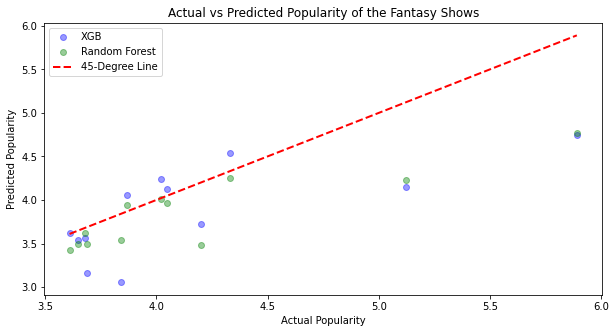

In [1658]:
# Scatterplotting the two models for Biography Shows
plt.figure(figsize=(10, 5))

plt.scatter(fan_y_test, fan_xgb_pred, color='blue', label='XGB', alpha = 0.4)
plt.scatter(fan_y_test, fan_random_pred, color='green', label='Random Forest', alpha = 0.4)
# The 45-degree red line
plt.plot([min(fan_y_test), max(fan_y_test)], [min(fan_y_test), max(fan_y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the Fantasy Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

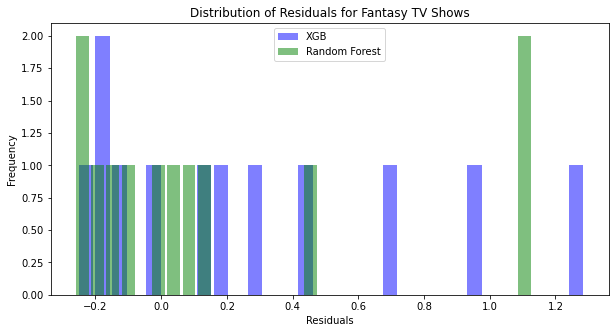

In [1503]:
#Residuals
fan_xgb_residuals = np.array(fan_y_test) - np.array(fan_xgb_pred)
fan_random_residuals = np.array(fan_y_test) - np.array(fan_random_pred)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(fan_xgb_residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'XGB' )

# Create a histogram of residuals
ax2 = plt.hist(fan_random_residuals, bins=30, color='green',alpha=0.5, rwidth=0.85, label = 'Random Forest' )


# Set labels and title
plt.title('Distribution of Residuals for Fantasy TV Shows')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

## 4.11 The Result Table For All Subsets <a id= '4.11_The_Result_Table_For_All_Subsets'><a>

First let's write down the datapoints for each data set.

In [1659]:
new_count = len(new_df)
new_train = len(new_X_train)
new_test = len (new_X_test)
crime_count = len(crime_df)
crime_train = len(crime_X_train)
crime_test = len(crime_X_test)
bio_count = len(bio_df)
bio_train = len(bio_X_train)
bio_test = len(bio_X_test)
fan_train = len(fan_X_train)
fan_test = len(fan_X_test)
fan_count = len(fan_df)
comedy_count = len(comedy_df)
comedy_test = len(comedy_X_test)
comedy_train = len(comedy_X_train)
drama_count = len(drama_df)
drama_train = len(drama_X_train)
drama_test = len(drama_X_test)
act_count = len (act_df)
act_test = len(act_X_test)
act_train = len(act_X_train)
pre_count = len(pre_df)
pre_test = len(pre_X_test)
pre_train = len(pre_X_train)
cov_count = len(cov_df)
cov_train = len(cov_X_train)
cov_test = len (cov_X_test)

In [1660]:
# checking
len (cov_X_test)

168

In [1661]:
# import table module
from tabulate import tabulate
 
mydata = [
    ["Whole Data",round(xgb_adjusted_r2,2), round(random_adjusted_r2,2), round(xgb_mape * 100,2), 
     round(random_mape * 100,2), new_count, new_test, new_train], 
    ["Pre_Pandemic", round(pre_xgb_adjusted_r2,2), round(pre_random_adjusted_r2,2), 
     round(pre_xgb_mape * 100,2), round(pre_random_mape * 100,2), pre_count, pre_test, pre_train], 
    ["Post_Pandemic", round(cov_xgb_adjusted_r2,2), round(cov_random_adjusted_r2,2), 
    round(cov_xgb_mape * 100,2), round(cov_random_mape * 100,2), cov_count, cov_test, cov_train], 
    ["Crime", round(crime_xgb_adjusted_r2,2),round(crime_random_adjusted_r2,2), 
     round(crime_xgb_mape * 100,2), round(crime_random_mape * 100,2),crime_count, crime_test, crime_train],
    ["Action", round(act_xgb_adjusted_r2,2),round(act_random_adjusted_r2,2), round(act_xgb_mape * 100,2),
     round(act_random_mape * 100,2), act_count, act_test, act_train],
    ["Biography", round(bio_xgb_adjusted_r2,2),round(bio_random_adjusted_r2,2), round(bio_xgb_mape * 100,2),
     round(bio_random_mape * 100,2), bio_count, bio_test, bio_train],
    ["Comedy",round(comedy_xgb_adjusted_r2,2), round(comedy_random_adjusted_r2,2),
     round(comedy_xgb_mape * 100,2), round(comedy_random_mape * 100,2), comedy_count, comedy_test, comedy_train],
    ["Drama",  round(drama_xgb_adjusted_r2,2),round(drama_random_adjusted_r2,2), 
     round(drama_xgb_mape * 100,2), round(drama_random_mape * 100,2),
    drama_count, drama_test, drama_train],
     ["Fantasy",  round(fan_xgb_adjusted_r2,2),round(fan_random_adjusted_r2,2), 
     round(fan_xgb_mape * 100,2), round(fan_random_mape * 100,2),
    fan_count, fan_test, fan_train]
    
]
 
# create header
head = ["Dataset", "XGB-A_r2", "Random-A_r2", "XGB MAPE(%)", "Random MAPE(%)", 
        'Data pts', 'Test Dpts', 'Train Dpts']
 
print(tabulate(mydata, headers=head, tablefmt="pretty"))

+---------------+----------+-------------+-------------+----------------+----------+-----------+------------+
|    Dataset    | XGB-A_r2 | Random-A_r2 | XGB MAPE(%) | Random MAPE(%) | Data pts | Test Dpts | Train Dpts |
+---------------+----------+-------------+-------------+----------------+----------+-----------+------------+
|  Whole Data   |   0.18   |    0.19     |    7.76     |      7.7       |   1241   |    311    |    930     |
| Pre_Pandemic  |  -2.34   |    -2.07    |    7.43     |      6.9       |   571    |    143    |    428     |
| Post_Pandemic |  -1.09   |    -1.09    |    7.91     |      8.04      |   670    |    168    |    502     |
|     Crime     |   1.22   |    1.23     |    9.31     |      9.44      |   161    |    41     |    120     |
|    Action     |   1.35   |    1.36     |    8.57     |      8.75      |   250    |    63     |    187     |
|   Biography   |   1.1    |    1.06     |    8.85     |      6.57      |    46    |    12     |     34     |
|    Comed

Models made with Random Forest Regression have the best MAPE scores six out of nine times. And the datasets(Pre-COVID, biography genre and fantasy genre) have the lowest MAPE results. 

In [1662]:
comedy_X_test.columns

Index(['startYear', 'endYear', 'Age', 'creator/actor?', 'ep_run_times',
       'no_of_ep', 'no_of_seasons', 'cast_pop', 'team_popularity',
       'genre_1_Action',
       ...
       'first_country_PT', 'first_country_SA', 'first_country_SE',
       'first_country_SG', 'first_country_TH', 'first_country_TR',
       'first_country_TW', 'first_country_US', 'first_country_VN',
       'first_country_ZA'],
      dtype='object', length=126)

## 4.12 Case Study: Which TV Shows Would Have Popularity Scores Above Mean Score?<a id= '4.12_Case_Study:_Which_TV_Shows_Would_Have_Popularity_Scores_Above_the_Mean_Score?'><a>

We aim for a popularity above average which is...

In [1663]:
# let's find the total_popularity above median
median_pop = round(new_df['total_popularity'].median(),2)
print(median_pop)



4.17


First case: a crime story with no name actors and writing team.

In [1665]:
#creating and checking the crime dataset for the client company Gaumont
crime_gaumont = pd.DataFrame(crime_X_test.iloc[0])
crime_gaumont = crime_gaumont.T

In [1512]:
crime_gaumont

,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,genre_1_Action,...,second_country_PT,second_country_SA,second_country_SE,second_country_TH,second_country_TN,second_country_TR,second_country_TW,second_country_US,second_country_VN,second_country_ZA
396,2019.0,2019.0,18.0,0.0,58.0,8.0,1.0,19.4,1.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Writing a formula for predicting the popularity score of crime shows:

In [1738]:
def predict_crime_pop (cast_pop, team_popularity, age, runT, season, no_ep, country, lang, genre_2):
#setting all values to 0 for the prediction function

    for col in crime_gaumont.columns:
        crime_gaumont[col].values[:] = 0
    # setting the constant values
    crime_gaumont['genre_1_Crime'] == 1
    crime_gaumont['startYear'] == 2024
    # adding the variables
    crime_gaumont['endYear'] == 2024 + season
    crime_gaumont['Age'] == age
    crime_gaumont['cast_pop'] == cast_pop
    crime_gaumont['team_popularity'] == team_popularity
    crime_gaumont['no_of_ep'] == no_ep
    crime_gaumont['no_of_seasons'] == season
    crime_gaumont['ep_run_times'] = runT
    # The country name makes the first_country column with the same name '1'
    country_column = [x for x in crime_gaumont.columns[crime_gaumont.columns.str.contains('first_country_{}'.format(country))]] 
    crime_gaumont[country_column]= 1
    genre_2_column = [x for x in crime_gaumont.columns[crime_gaumont.columns.str.contains('genre_2_{}'.format(genre_2))]] 
    crime_gaumont[genre_2_column]= 1
    lang_column = [x for x in crime_gaumont.columns[crime_gaumont.columns.str.contains('origin_language{}'.format(genre_2))]] 
    crime_gaumont[lang_column]= 1
    # Calling and efining predictions
    xgb_pop = crime_xgb.predict(crime_gaumont)

    random_pop = crime_random.predict(crime_gaumont)
    # conditioning based on the average popularity
    if xgb_pop >= median_pop:
        print ('{} -The popularity of the crime project in {} IS predicted to be above average according to XGB'
              .format(xgb_pop, country))
    else:
        print ('{} -The popularity of the crime project in {} IS NOT predicted to be above average according to XGB'.
              format(xgb_pop, country))
    
    if random_pop >= median_pop:
        print ('{} -The popularity of the crime project in {} IS predicted to be above average according to Random Forest'
              .format(random_pop, country ))
    else:
        print ('{} -The popularity of the crime project in {} IS NOT predicted to be above average according to Random Forest'
              .format(random_pop, country))




Let's find the minimum cast_popularity and team_popularity numbers as reference for trying our function.

In [1767]:
print(new_df['cast_pop'].min())
print(new_df['team_popularity'].min())


0.6
0.6


In [1739]:
#Turkey
predict_crime_pop(1,1,18,60,2,16,'TR','tr', 'Drama')

[4.1317167] -The popularity of the crime project in TR IS NOT predicted to be above average according to XGB
[4.0929901] -The popularity of the crime project in TR IS NOT predicted to be above average according to Random Forest


In [1676]:
#trying a different country. USA and France
predict_crime_pop(1,1,18,60,2,16,'US','en', 'Drama')

[4.1562166] -The popularity of the crime project in US IS NOT predicted to be above average according to XGB
[4.17467458] -The popularity of the crime project in US IS predicted to be above average according to Random Forest


In [1677]:
#trying a different country. USA and France
predict_crime_pop(1,1,18,60,2,16,'MX', 'es', 'Drama')

[4.1317167] -The popularity of the crime project in MX IS NOT predicted to be above average according to XGB
[4.0929901] -The popularity of the crime project in MX IS NOT predicted to be above average according to Random Forest


Making the predictions using the whole dataset:

In [1680]:
def predict_show_pop (cast_pop, team_popularity, age, runT, season, no_ep, country, lang, genre_1, genre_2):
#setting all values to 0 for the prediction function

    for col in gaumont_df.columns:
        gaumont_df[col].values[:] = 0
    # setting the constant values
    gaumont_df['startYear'] == 2024
    # adding the variables
    gaumont_df['endYear'] == 0
    gaumont_df['Age'] == age
    gaumont_df['cast_pop'] == cast_pop
    gaumont_df['team_popularity'] == team_popularity
    gaumont_df['no_of_ep'] == no_ep
    gaumont_df['no_of_seasons'] == season
    gaumont_df['ep_run_times'] = runT
    # The country name makes the first_country column with the same name '1'
    country_column = [x for x in gaumont_df.columns[gaumont_df.columns.str.contains('first_country_{}'.format(country))]] 
    gaumont_df[country_column]= 1
    #genre_1
    genre_1_column = [x for x in gaumont_df.columns[gaumont_df.columns.str.contains('genre_1_{}'.format(genre_1))]] 
    gaumont_df[genre_1_column]= 1
    #genre_2
    genre_2_column = [x for x in gaumont_df.columns[gaumont_df.columns.str.contains('genre_2_{}'.format(genre_2))]] 
    gaumont_df[genre_2_column]= 1
    lang_column = [x for x in gaumont_df.columns[gaumont_df.columns.str.contains('origin_language{}'.format(genre_2))]] 
    gaumont_df[lang_column]= 1
    
    # Calling and efining predictions
    xgb_pop = xgboost.predict(gaumont_df)

    random_pop = random.predict(gaumont_df)
    # conditioning based on the average popularity
    if xgb_pop >= median_pop:
        print ('{} -The popularity of the series in {}/{} IS predicted to be above average according to XGB'
              .format(xgb_pop, genre_1, genre_2, country))
    else:
        print ('{} -The popularity of the series in {}/{} IS NOT predicted to be above average according to XGB'.
              format(xgb_pop,genre_1, genre_2, country))
    
    if random_pop >= median_pop:
        print ('{} -The popularity of the {}/{} series in {} IS predicted to be above average according to Random Forest'
              .format(random_pop, genre_1, genre_2, country ))
    else:
        print ('{} -The popularity of the {}/{} series in {} IS NOT predicted to be above average according to Random Forest'
              .format(random_pop, genre_1, genre_2, country))




In [1681]:
predict_show_pop(1,1,18,60,2,16,'TR','tr', 'Action','Drama')

[3.7328024] -The popularity of the series in Action/Drama IS NOT predicted to be above average according to XGB
[3.9] -The popularity of the Action/Drama series in TR IS NOT predicted to be above average according to Random Forest


In [1682]:
#trying a different country. USA and France

predict_show_pop(100,100,0,30,10,300,'US','en','Drama', 'Fantasy')

[3.5091143] -The popularity of the series in Drama/Fantasy IS NOT predicted to be above average according to XGB
[3.4964] -The popularity of the Drama/Fantasy series in US IS NOT predicted to be above average according to Random Forest


In [1683]:
#France and Japan
predict_show_pop(1,1,18,60,2,16,'JP','jp', 'Drama', 'Action')

[3.7326424] -The popularity of the series in Drama/Action IS NOT predicted to be above average according to XGB
[3.7792] -The popularity of the Drama/Action series in JP IS NOT predicted to be above average according to Random Forest


Let's try biography genre:

In [1685]:
def predict_bio_pop (cast_pop, team_popularity, age, runT, season, no_ep, country, lang, genre_2):
#setting all values to 0 for the prediction function

    for col in bio_gaumont.columns:
        bio_gaumont[col].values[:] = 0
    # setting the constant values
    bio_gaumont['genre_1_Biography'] == 1
    bio_gaumont['startYear'] == 2024
    # adding the variables
    bio_gaumont['endYear'] == 2024 + season
    bio_gaumont['Age'] == age
    bio_gaumont['cast_pop'] == cast_pop
    bio_gaumont['team_popularity'] == team_popularity
    bio_gaumont['no_of_ep'] == no_ep
    bio_gaumont['no_of_seasons'] == season
    bio_gaumont['ep_run_times'] = runT
    # The country name makes the first_country column with the same name '1'
    country_column = [x for x in bio_gaumont.columns[bio_gaumont.columns.str.contains('first_country_{}'.format(country))]] 
    bio_gaumont[country_column]= 1
    genre_2_column = [x for x in bio_gaumont.columns[bio_gaumont.columns.str.contains('genre_2_{}'.format(genre_2))]] 
    bio_gaumont[genre_2_column]= 1
    lang_column = [x for x in bio_gaumont.columns[bio_gaumont.columns.str.contains('origin_language{}'.format(genre_2))]] 
    bio_gaumont[lang_column]= 1
    # Calling and efining predictions
    xgb_pop = bio_xgb.predict(bio_gaumont)

    random_pop = bio_random.predict(bio_gaumont)
    # conditioning based on the average popularity
    if xgb_pop >= median_pop:
        print ('{} -The popularity of the Biography project in {} IS predicted to be above average according to XGB'
              .format(xgb_pop, country))
    else:
        print ('{} -The popularity of the Biography project in {} IS NOT predicted to be above average according to XGB'.
              format(xgb_pop, country))
    
    if random_pop >= median_pop:
        print ('{} -The popularity of the Biography project in {} IS predicted to be above average according to Random Forest'
              .format(random_pop, country ))
    else:
        print ('{} -The popularity of the Biography project in {} IS NOT predicted to be above average according to Random Forest'
              .format(random_pop, country))




In [1686]:
predict_bio_pop(40,20,14, 60,2,12,'US','en', 'Drama')

[3.590322] -The popularity of the Biography project in US IS NOT predicted to be above average according to XGB
[3.82535356] -The popularity of the Biography project in US IS NOT predicted to be above average according to Random Forest


In [1687]:
predict_bio_pop(40,20,0,60,2,16,'MX', 'es', 'Drama')

[3.4668217] -The popularity of the Biography project in MX IS NOT predicted to be above average according to XGB
[3.68933716] -The popularity of the Biography project in MX IS NOT predicted to be above average according to Random Forest


In [1688]:
predict_bio_pop(1,1,14,20,1,6,'MX','es','Comedy')

[3.0519638] -The popularity of the Biography project in MX IS NOT predicted to be above average according to XGB
[3.62109066] -The popularity of the Biography project in MX IS NOT predicted to be above average according to Random Forest


Now, let's have a bigger cast. Like in the second quartile in the ranking.

In [1689]:
qnt3rd_cast_pop = np.percentile(new_df['cast_pop'], 75)
qnt3rd_cast_pop 

29.9

In [1691]:

predict_bio_pop(qnt3rd_cast_pop,1,14,20,1,6,'TR','tr', 'Drama')

[3.0374398] -The popularity of the Biography project in TR IS NOT predicted to be above average according to XGB
[3.62109066] -The popularity of the Biography project in TR IS NOT predicted to be above average according to Random Forest


In [1692]:
predict_bio_pop(qnt3rd_cast_pop ,1,0,60,2,16,'UK', 'en','Drama')

[3.4688349] -The popularity of the Biography project in UK IS NOT predicted to be above average according to XGB
[3.68933716] -The popularity of the Biography project in UK IS NOT predicted to be above average according to Random Forest


In [1693]:
predict_crime_pop(qnt2nd_cast_pop ,1,0,60,2,16,'TR', 'tr','Drama')

[4.1317167] -The popularity of the crime project in TR IS NOT predicted to be above average according to XGB
[4.0929901] -The popularity of the crime project in TR IS NOT predicted to be above average according to Random Forest


Let's try unknown cast and successful creating team.

In [1157]:
qnt3rd_team_pop = np.percentile(new_df['team_popularity'], 75)
qnt3rd_team_pop 

2.7

In [1765]:
predict_crime_pop(1, qnt3rd_team_pop,16,60, 2, 20,'US','en', 'Drama')

[4.1562166] -The popularity of the crime project in US IS NOT predicted to be above average according to XGB
[4.17467458] -The popularity of the crime project in US IS predicted to be above average according to Random Forest


The crime shows in the US can hit the mean score for popularity.

In [1755]:
predict_bio_pop(1,qnt3rd_team_pop,18,60,2,16,'KR','kr', 'Drama')

[3.4688349] -The popularity of the Biography project in KR IS NOT predicted to be above average according to XGB
[3.68933716] -The popularity of the Biography project in KR IS NOT predicted to be above average according to Random Forest


Let's see Iceland since it produces many crime shows with Netflix:

In [1763]:
predict_crime_pop(1,qnt3rd_team_pop,18,60,4,40,'IS','is', 'Drama')

[4.1317167] -The popularity of the crime project in IS IS NOT predicted to be above average according to XGB
[4.0929901] -The popularity of the crime project in IS IS NOT predicted to be above average according to Random Forest


In [1766]:
predict_bio_pop(1,qnt3rd_team_pop,18,60,4,40,'IS','is', 'Drama')

[3.4688349] -The popularity of the Biography project in IS IS NOT predicted to be above average according to XGB
[3.68933716] -The popularity of the Biography project in IS IS NOT predicted to be above average according to Random Forest


The crime shows in Iceland are close to the mean popularity but the biography shows would not reach popularity.

In [1733]:
predict_crime_pop(10, qnt3rd_team_pop,18,70,5,50,'IS', 'is', 'Drama')

[4.162048] -The popularity of the crime project in IS IS NOT predicted to be above average according to XGB
[4.0929901] -The popularity of the crime project in IS IS NOT predicted to be above average according to Random Forest


Spain, Iceland, Korea and USA are good countries to take a chance on no names and hence save a lot of money in budgeting.

## 4.13 Conclusion <a id= '4.13_Conclusion'><a>


In this section we customized our Random Forest Regression and XGB Regression models by first measuring/plotting feature importances and eliminating a few features (second_country, Streamer)for each model type. 

By using Randomized Search Cross Validation we tuned the hyperparameters to improve the model. 

Finally we created different subsets of the data based on time periods(Pre-Pandemic:1983-2019) and Post-Pandemic(2019-2023). It was evident that the Mean Absolute Percentage Error was less for the Pre-Pandemic Era (%6.9).

Another type of subsets we used was based on genre. We created subsets out of projects with genres Drama, Action, Crime, Fantasy, Comedy and Biography. Fantasy and Biography had MAPEs under %7, which is a good improvement from the baseline modelings. 

After creating a model, we build a function to predict the popularity of a tv series based on its features.
After trying the function implementing the model, it was evident that the most crucial features were running time, country of production and first genre. 

It would be useful to build a function which would predict potential features that can allow us to reach a totality score that is above mean totality score.(4.17). In other words, it would be beneficiary to have a reverse model.
